### Import libraries

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import numpy as np
import matplotlib.pyplot as plt

2023-12-27 09:26:46.970017: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-27 09:26:46.972565: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 09:26:47.026993: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-27 09:26:47.027855: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 09:26:48.100905: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Load data

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)

In [3]:
# multiclass change class_mode='binary'->'categorical' 
# And also change the no of neurons in last layer
train=train_datagen.flow_from_directory('DogCat/training_set/',class_mode='binary',target_size=(64,64))

Found 15 images belonging to 2 classes.


In [4]:
test= test_datagen.flow_from_directory('DogCat/test_set/',class_mode='binary',target_size=(64,64))

Found 7 images belonging to 2 classes.


### Build the Model

In [5]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(64,64,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=8,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 16)                2

### Model Compile

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

### Train the model

In [8]:
model.fit(train,epochs=10,validation_data=test, batch_size=1)

Epoch 1/10


2023-12-27 09:26:50.586522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - ETA: 0s - loss: 0.6862 - accuracy: 0.6000

2023-12-27 09:26:51.843067: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 1s 1s/step - loss: 0.6862 - accuracy: 0.6000 - val_loss: 0.6897 - val_accuracy: 0.5714
Epoch 2/10
1/1 [==============================] - 0s 108ms/step - loss: 0.6835 - accuracy: 0.6000 - val_loss: 0.6878 - val_accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 0s 116ms/step - loss: 0.6697 - accuracy: 0.6667 - val_loss: 0.6827 - val_accuracy: 0.7143
Epoch 4/10
1/1 [==============================] - 0s 109ms/step - loss: 0.6773 - accuracy: 0.6000 - val_loss: 0.6733 - val_accuracy: 0.8571
Epoch 5/10
1/1 [==============================] - 0s 107ms/step - loss: 0.6459 - accuracy: 0.8000 - val_loss: 0.6634 - val_accuracy: 0.8571
Epoch 6/10
1/1 [==============================] - 0s 111ms/step - loss: 0.6282 - accuracy: 0.6667 - val_loss: 0.6586 - val_accuracy: 0.7143
Epoch 7/10
1/1 [==============================] - 0s 109ms/step - loss: 0.6406 - accuracy: 0.4667 - val_loss: 0.6592 - val_accuracy: 0.7143
Epoch 8/10
1/1 [==================

In [9]:
train.class_indices

{'cat': 0, 'dog': 1}

### By using keras read image

In [10]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

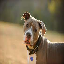

In [19]:
test_img=load_img('DogCat/sample2.jpeg',target_size=(64,64))
test_img

In [20]:
test_img=img_to_array(test_img)

In [21]:
test_img=np.expand_dims(test_img,axis=0)
test_img.shape

(1, 64, 64, 3)

In [22]:
model.predict(test_img)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)